In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.plot import show
from rasterio.mask import mask
import skimage as skm
from skimage import exposure, img_as_float

In [13]:
# Define the path to the image
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"

In [14]:
# Define the bandwidths (this is for SkySat images)
band_wavelengths = {
    'Blue': (450, 515),
    'Green': (515, 595),
    'Red': (605, 695),
    'NIR': (740, 900)
}

In [15]:
# Select two pixels to compare, pixels gathered from spectral_bandwidth_pixel, and 
pixel1 = (2820.69, 1257.16)  # Pixel coordinates for the first pixel
pixel2 = (2802.3, 1229.4)    # Pixel coordinates for the second pixel

In [17]:
# Open the SkySat image
with rasterio.open(image_path) as dataset:
    # Extract spectral signatures for pixel 1
    spectral_signature1 = []
    for band in range(dataset.count):
        value = dataset.read(band + 1, window=((2820.69, 2820.69 + 1), (1257.16, 1257.16 + 1))) # (x1, + x1 + 1), (y1, y1 + 1)
        spectral_signature1.append(value[0][0])

    # Extract spectral signatures for pixel 2
    spectral_signature2 = []
    for band in range(dataset.count):
        value = dataset.read(band + 1, window=((2802.3, 2802.3 + 1), (1229.4, 1229.4 + 1)))     # (x2, x2 + 1), (y2, y2 + 1)
        spectral_signature2.append(value[0][0])

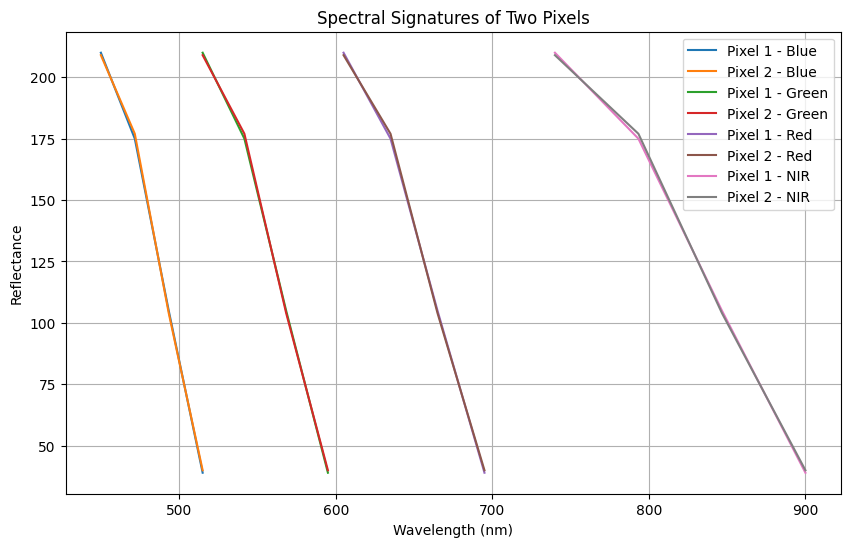

In [18]:
# Plot spectral signatures
plt.figure(figsize=(10, 6))
for band_name, (min_wavelength, max_wavelength) in band_wavelengths.items():
    wavelengths = np.linspace(min_wavelength, max_wavelength, dataset.count)
    plt.plot(wavelengths, spectral_signature1, label=f'Pixel 1 - {band_name}')
    plt.plot(wavelengths, spectral_signature2, label=f'Pixel 2 - {band_name}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of Two Pixels')
plt.legend()
plt.grid(True)
plt.show()

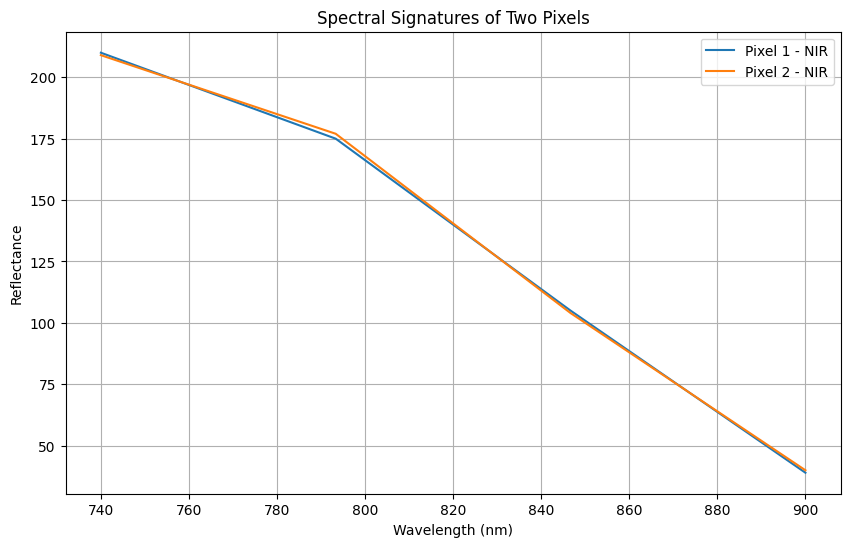

In [19]:
# Plot spectral signatures
plt.figure(figsize=(10, 6))

plt.plot(wavelengths, spectral_signature1, label=f'Pixel 1 - {band_name}')
plt.plot(wavelengths, spectral_signature2, label=f'Pixel 2 - {band_name}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of Two Pixels')
plt.legend()
plt.grid(True)
plt.show()

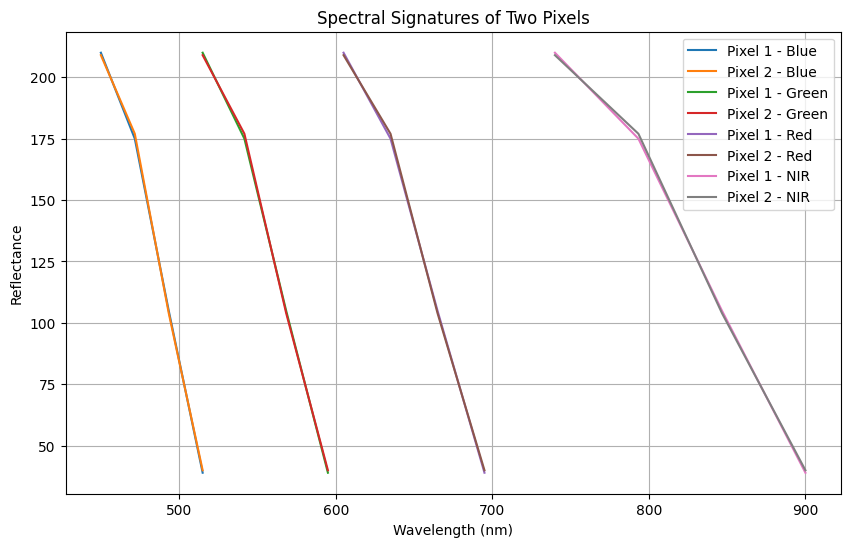

In [29]:
plt.figure(figsize=(10, 6))
for band_name, (min_wavelength, max_wavelength) in band_wavelengths.items():
    wavelengths = np.linspace(min_wavelength, max_wavelength, dataset.count)
    plt.plot(wavelengths, spectral_signature1, label=f'Pixel 1 - {band_name}')
    plt.plot(wavelengths, spectral_signature2, label=f'Pixel 2 - {band_name}')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('Spectral Signatures of Two Pixels')
plt.legend()
plt.grid(True)
plt.show()

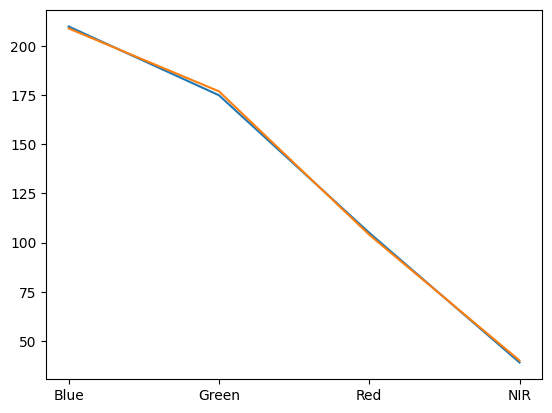

In [31]:
plt.plot(band_wavelengths.keys(), spectral_signature1, label=f'Pixel 1 - {band_name}')
plt.plot(band_wavelengths.keys(), spectral_signature2, label=f'Pixel 2 - {band_name}')

In [32]:
print(spectral_signature1)

[210, 175, 105, 39]


In [33]:
print(spectral_signature2)

[209, 177, 104, 40]


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure 
from skimage import io

In [5]:
def mouseClick(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xaxis = []
        yaxis = []
        for i in range(len(imgcol)):
            xaxis.append('Band{}'.format(i+1))
            yaxis.append(imgcol[i][y,x])
        plt.plot(xaxis, yaxis)
        plt.title('Spectral Profile')
        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


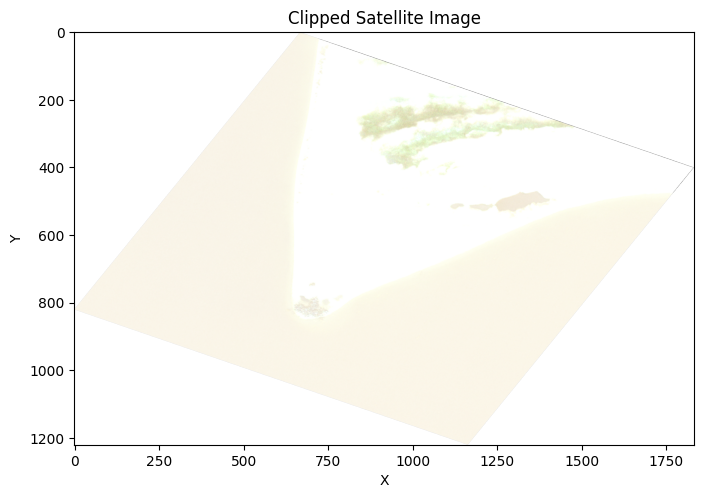

In [11]:
# Function to clip the image by shape
def clip_image(image_path, shape_path):
    # Read the shapefile
    shapefile = gpd.read_file(shape_path)
    # Open the satellite image
    with rasterio.open(image_path) as src:
        # Clip the image
        clipped_image, clipped_transform = mask(src, shapefile.geometry, crop=True)
        # Get the metadata of the clipped image
        clipped_meta = src.meta.copy()
        clipped_meta.update({"driver": "GTiff",
                             "height": clipped_image.shape[1],
                             "width": clipped_image.shape[2],
                             "transform": clipped_transform})
    return clipped_image, clipped_meta

# File path to the satellite image (TIF file)
image_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\torellneset_skysatscene_pansharpened_udm2\\SkySatScene\\20230825_104320_ssc13d3_0006_pansharpened_clip.tif"

# Create path to the shapefile 
shape_path = "C:\\Users\\Student\\Documents\\101_walrus_mres\\GIS\\torellneset_clip_825.shp"

# Clip the image
clipped_image, clipped_meta = clip_image(image_path, shape_path)

# Plot the clipped image
plt.figure(figsize=(8, 6))
plt.imshow(clipped_image.transpose(1, 2, 0))  # Transpose to (height, width, bands) for visualization
plt.title('Clipped Satellite Image')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
imgcol = clipped_image
image = np.array(imgcol[3])
img = exposure.adjust_log(image)

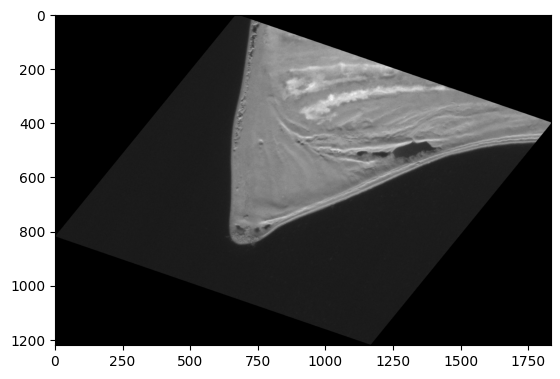

In [15]:
plt.plot()
plt.imshow(img, cmap='gray')
plt.show()

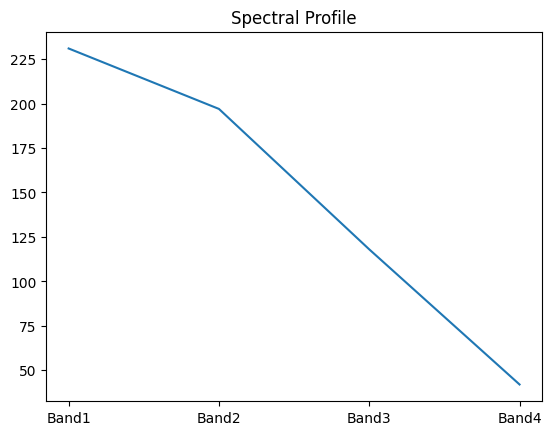

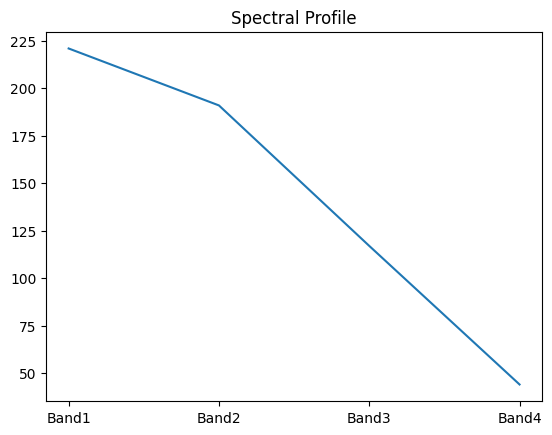

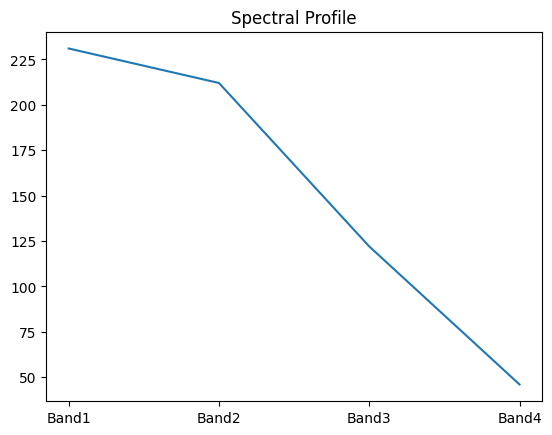

KeyboardInterrupt: 

In [16]:
cv2.namedWindow('mouseClick', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('mouseClick', mouseClick)

while True:
    cv2.imshow('mouseClick', img)
    if cv2.waitKey(20)==27:
        break
cv2.destroyAllWindows()

(1221, 1834)